<a href="https://colab.research.google.com/github/AnwHus007/Tensorflow/blob/main/Cats%20Vs%20Dogs/Cats%20Vs%20Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [81]:
#Downloading helper_functions(A Python script that includes a set of functions used while building Deep Learning model)
!wget https://raw.githubusercontent.com/AnwHus007/Tensorflow/main/Functions/helper_functions.py

--2023-05-03 06:52:27--  https://raw.githubusercontent.com/AnwHus007/Tensorflow/main/Functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10410 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.17K  --.-KB/s    in 0s      

2023-05-03 06:52:27 (82.8 MB/s) - ‘helper_functions.py.1’ saved [10410/10410]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Checking dataset

In [15]:
X_train = np.loadtxt('/content/drive/MyDrive/CatsDogs/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/CatsDogs/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/CatsDogs/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/CatsDogs/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [18]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [103]:
def Predict(num):
  num = num > 0.5
  if(num == 0):
    return 'Dog'
  else:
    return 'Cat'

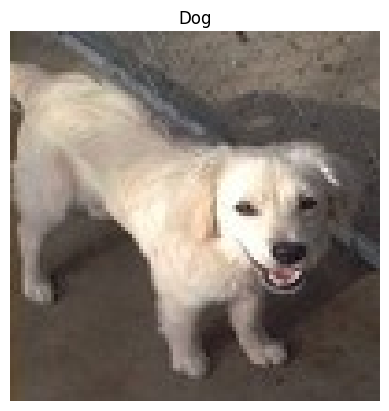

In [104]:
ran = random.randint(0, len(Y_test))
image = X_train[ran]
plt.imshow(image)
plt.title(Predict(Y_train[ran]))
plt.axis(False);

In [87]:
from helper_functions import create_tensorboard_callback
# EarlyStopping Callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3, verbose=1, monitor="val_accuracy")
     
# ReduceLROnPlateau Callback

lower_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                                monitor='val_accuracy',
                                                min_lr=1e-7,
                                                patience=0,
                                                verbose=1)
     

# Build Model

In [88]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [89]:
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0)

In [96]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 32)

Epoch 1/5
63/63 [==============================] - 27s 400ms/step - loss: 0.2992 - accuracy: 0.8750
Epoch 2/5
63/63 [==============================] - 23s 364ms/step - loss: 0.2409 - accuracy: 0.9035
Epoch 3/5
63/63 [==============================] - 25s 400ms/step - loss: 0.1861 - accuracy: 0.9320
Epoch 4/5
63/63 [==============================] - 26s 413ms/step - loss: 0.1106 - accuracy: 0.9640
Epoch 5/5
63/63 [==============================] - 32s 510ms/step - loss: 0.0772 - accuracy: 0.9790


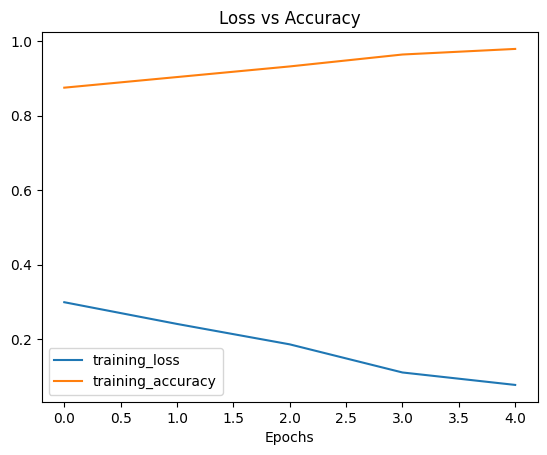

In [101]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(len(history.history['loss']))

plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, accuracy, label='training_accuracy')
plt.title('Loss vs Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [102]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 84ms/step - loss: 0.9865 - accuracy: 0.7000


[0.9865080118179321, 0.699999988079071]

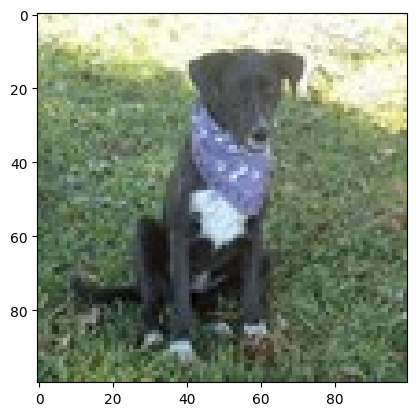

1/1 [==============================] - 0s 34ms/step
The image is of a Dog (Confidence Level = 91.7087% )


In [128]:
tran = random.randint(0, len(Y_test))
plt.imshow(X_test[tran, :])
plt.show()

Y_pred = model.predict(X_test[tran, :].reshape(1, 100, 100, 3))
conf = float(Y_pred[0][0]*100)
conf = round(conf,4)
print("The image is of a " + str(Predict(Y_pred[0])) + " (Confidence Level = " + str(max(conf,(100 - conf)))+ "% )")